In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(r'C:\Users\Kerry\Student_Performance_on_an_Entrance_Examination.csv')
print(data.shape)
data.head()

(666, 12)


,Gender,Caste,coaching,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation,time,Performance
0,male,General,NO,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS,ONE,Excellent
1,male,OBC,WA,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE,TWO,Excellent
2,male,OBC,OA,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE,TWO,Excellent
3,male,General,WA,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER,ONE,Excellent
4,male,General,OA,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE,TWO,Excellent


In [3]:
data.duplicated().sum()

44

In [4]:
data =  data.drop_duplicates()

In [5]:
data.isnull().sum()

Gender                  0
Caste                   0
coaching                0
Class_ten_education     0
twelve_education        0
medium                  0
Class_X_Percentage      0
Class_XII_Percentage    0
Father_occupation       0
Mother_occupation       0
time                    0
Performance             0
dtype: int64

In [6]:
# Convert categorical values to numbers
ordinal_mapping = {'Average': 4, 'Good': 3, 'Vg': 2, 'Excellent': 1}
data['Class_X_Percentage'] = data['Class_X_Percentage'].map(ordinal_mapping)
data['Class_XII_Percentage'] = data['Class_XII_Percentage'].map(ordinal_mapping)
data['Performance'] = data['Performance'].map(ordinal_mapping)

In [8]:
# Label encoding categorical values
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_cols = ['Gender', 'Caste', 'coaching', 'Class_ten_education', 'twelve_education', 
                    'medium', 'Father_occupation', 'Mother_occupation', 'time', 'Performance']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le 

In [9]:
print(data.head())

   Gender  Caste  coaching  Class_ten_education  twelve_education  medium  \
0       1      0         0                    2                 0       1   
1       1      1         2                    2                 0       2   
2       1      1         1                    1                 1       1   
3       1      0         2                    2                 0       2   
4       1      0         1                    2                 1       1   

   Class_X_Percentage  Class_XII_Percentage  Father_occupation  \
0                   1                     1                  4   
1                   1                     1                  7   
2                   1                     1                  1   
3                   1                     1                  7   
4                   1                     1                  2   

   Mother_occupation  time  Performance  
0                  7     2            0  
1                  6     5            0  
2             

In [11]:
# Predicting performance
X = data.drop(columns=['Performance'])
y = data['Performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error: 0.55
Mean Absolute Error: 0.59
R² Score: 0.45


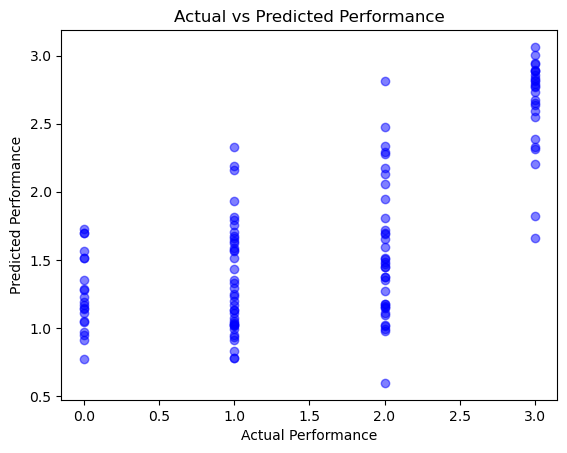

In [12]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Actual vs Predicted Performance")
plt.show()